In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


In [2]:
import pandas as pd

# Load both datasets
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

# Show first 10 rows from each
print("📰 FAKE NEWS DATASET (first 10 rows):")
display(fake_df.head(10))

print("\n✅ TRUE NEWS DATASET (first 10 rows):")
display(true_df.head(10))

📰 FAKE NEWS DATASET (first 10 rows):


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"



✅ TRUE NEWS DATASET (first 10 rows):


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [3]:
# Add label column
fake_df["label"] = 0  # 0 = Fake
true_df["label"] = 1  # 1 = True

# Combine and shuffle
df = pd.concat([fake_df, true_df], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

# Show first 10 rows of the combined dataset
df.head(10)

,title,text,subject,date,label
0,Email leak may hurt Democratic party chair's r...,WASHINGTON (Reuters) - An email leak that led ...,politicsNews,"July 25, 2016",1
1,"Trends Show Republicans Are SCREWED For 2016,...",Hillary Clinton and Donald Trump emerged victo...,News,"April 20, 2016",0
2,Trump Once Threatened ‘Apprentice’ Contenstan...,After it was revealed in the leaked Access Hol...,News,"October 15, 2016",0
3,Ground Zero Mosque Was NOT Defeated: Three Sto...,Will the new 3-story Islamic Museum include pi...,Government News,"Sep 29, 2015",0
4,Putin-Trump meeting not yet planned for Asia s...,MOSCOW (Reuters) - Russian President Vladimir ...,worldnews,"October 23, 2017",1
5,Homeland Security nominee says no need for ful...,(Reuters) - Donald Trump’s nominee to head the...,politicsNews,"November 8, 2017",1
6,MAKE IT STOP! Daughter Of Sexual Predator And ...,Apparently being the daughter of the most corr...,left-news,"May 2, 2016",0
7,‘Stop Arming Terrorists Bill’ Fails in US Cong...,21st Century Wire says What this latest result...,Middle-east,"June 21, 2017",0
8,MOOCH CRIES VICTIM (Again) In Speech To Argent...,Ahhh Mooch The perpetual victim. Never mind th...,left-news,"Mar 24, 2016",0
9,WOW! Reporters Try To Question Her Dad’s Tempe...,Don t mess with daddy s little girl! Ivanka Tr...,politics,"Aug 10, 2016",0


# 🗓️ Week 2 — Data Cleaning
This section focuses on removing duplicates, null values, and cleaning text in the Fake and True datasets.

In [5]:
import pandas as pd

# Load datasets
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

print("✅ Data Loaded Successfully!")
print("Fake shape:", fake.shape)
print("True shape:", true.shape)

✅ Data Loaded Successfully!
Fake shape: (23481, 4)
True shape: (21417, 4)


In [6]:
print("Fake News Dataset Info:")
print(fake.info())
print("\nMissing values in Fake dataset:\n", fake.isnull().sum())

print("\nTrue News Dataset Info:")
print(true.info())
print("\nMissing values in True dataset:\n", true.isnull().sum())

Fake News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None

Missing values in Fake dataset:
 title      0
text       0
subject    0
date       0
dtype: int64

True News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None

Missing values in True dataset:
 title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
fake.head()
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
fake_before = fake.shape[0]
true_before = true.shape[0]

fake.drop_duplicates(inplace=True)
true.drop_duplicates(inplace=True)

print("Removed", fake_before - fake.shape[0], "duplicate rows from Fake dataset.")
print("Removed", true_before - true.shape[0], "duplicate rows from True dataset.")

Removed 3 duplicate rows from Fake dataset.
Removed 206 duplicate rows from True dataset.


In [11]:
fake.dropna(inplace=True)
true.dropna(inplace=True)

In [13]:
import re

def clean_text(text):
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower().strip()  # lowercase + remove extra spaces
    return text

fake['text'] = fake['text'].apply(clean_text)
true['text'] = true['text'].apply(clean_text)

In [15]:
fake['label'] = 0   # Fake
true['label'] = 1   # True

data = pd.concat([fake, true], axis=0)
data.reset_index(drop=True, inplace=True)

print("Final Dataset Shape:", data.shape)
data.head()

Final Dataset Shape: (44689, 5)


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that h...,News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",0


In [16]:
print("✅ AFTER CLEANING SUMMARY ✅")
print("Rows:", data.shape[0])
print("Missing Values:", data.isnull().sum().sum())
print("Duplicate Rows:", data.duplicated().sum())

✅ AFTER CLEANING SUMMARY ✅
Rows: 44689
Missing Values: 0
Duplicate Rows: 2


# 🧾 Assignment 3: Data Visualization  
*Course:* Applied Data Science with AI   
*Project:* Fake News Detection  

### 🎯 Objective
The goal of this assignment is to create *5 different plots* from the Fake News dataset and provide *insights* for each visualization.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

## 📂 Step 1: Load Dataset  
We will use the Fake and True news CSV files, combine them, and label them accordingly.

In [19]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake["label"] = 0
true["label"] = 1

data = pd.concat([fake, true], axis=0)
data.reset_index(drop=True, inplace=True)

print("Dataset loaded successfully ✅")
print("Shape:", data.shape)

Dataset loaded successfully ✅
Shape: (44898, 5)


## 📊 Plot 1: Count of Fake vs True News  
This plot shows how many articles belong to each class (Fake or True).

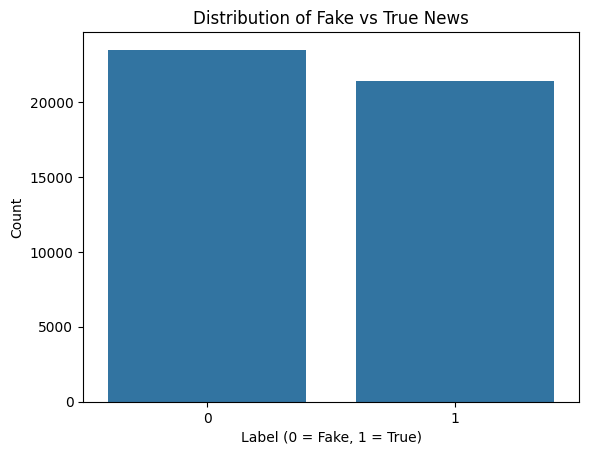

In [20]:
sns.countplot(x='label', data=data)
plt.title("Distribution of Fake vs True News")
plt.xlabel("Label (0 = Fake, 1 = True)")
plt.ylabel("Count")
plt.show()

*Insight:*  
There are more fake news articles than true ones, indicating class imbalance in the dataset that could affect model training.

## 📈 Plot 2: News Article Length Distribution  
We analyze the distribution of article lengths to understand how long most news texts are.

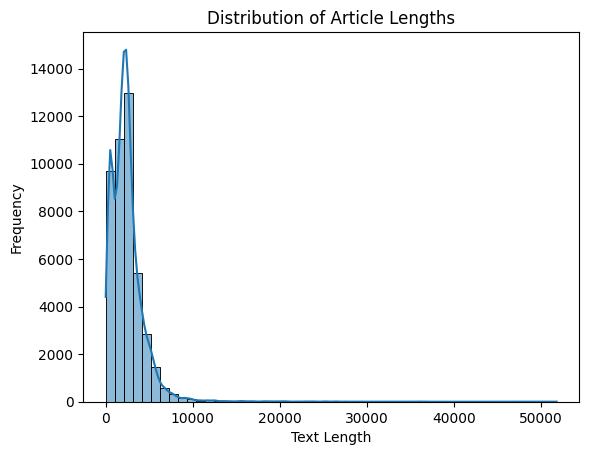

In [21]:
data['text_length'] = data['text'].apply(len)

sns.histplot(data['text_length'], bins=50, kde=True)
plt.title("Distribution of Article Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

*Insight:*  
Most articles have moderate length; very long or short articles are rare, showing that most news reports are fairly consistent in size.

## ☁️ Plot 3: Word Count Comparison by Label  
Here we compare the number of words per article between Fake and True news.

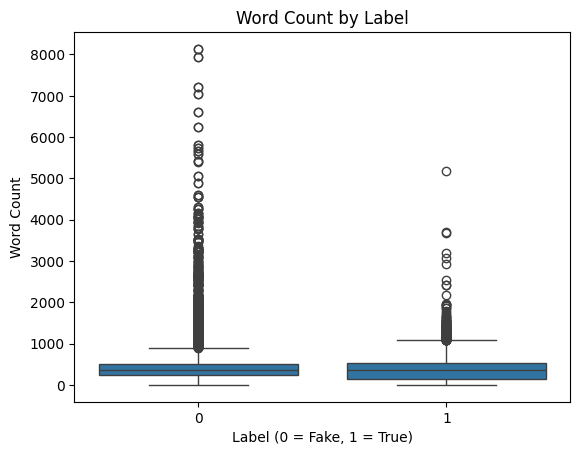

In [22]:
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))
sns.boxplot(x='label', y='word_count', data=data)
plt.title("Word Count by Label")
plt.xlabel("Label (0 = Fake, 1 = True)")
plt.ylabel("Word Count")
plt.show()

*Insight:*  
True news articles tend to have a slightly higher average word count than fake ones, suggesting that real articles may include more context.

## 📰 Plot 4: Top 10 Common Words in Fake News  
We examine which words are most frequently used in fake articles.

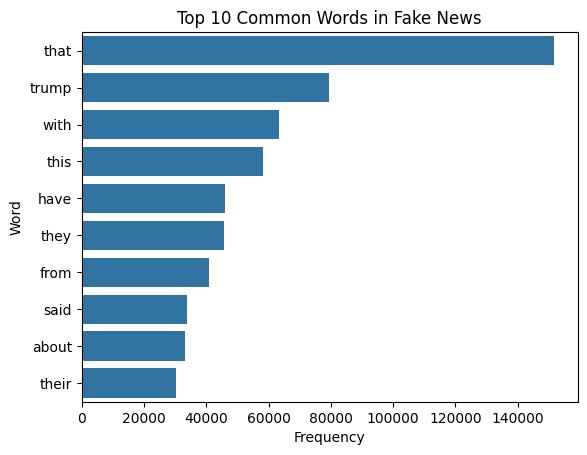

In [23]:
words = " ".join(fake['text']).lower()
words = re.findall(r'\b[a-z]{4,}\b', words)
common_words = Counter(words).most_common(10)

word_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=word_df)
plt.title("Top 10 Common Words in Fake News")
plt.show()

*Insight:*  
Frequent words like “said”, “trump”, and “news” appear often, indicating political and media-related themes in fake articles.

## 🔥 Plot 5: Correlation Heatmap  
We visualize correlations between numeric columns such as text length and word count.

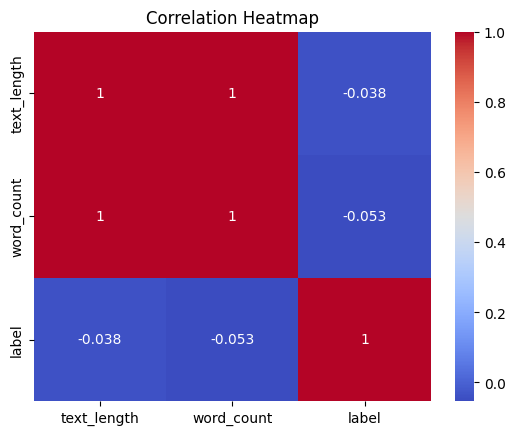

In [24]:
sns.heatmap(data[['text_length', 'word_count', 'label']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

*Insight:*  
There is a strong positive correlation between text length and word count, which is expected as longer texts naturally contain more words.

# 🧾 Assignment 4: Correlation Analysis  
**Course:** Applied Data Science with AI

**Project:** Fake News Detection  

### 🎯 Objective  
Perform correlation analysis to identify which 3 features are most related to the target variable (`label`).


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake["label"] = 0
true["label"] = 1

data = pd.concat([fake, true], axis=0)
data.reset_index(drop=True, inplace=True)

print("Dataset Loaded ✅")


Dataset Loaded ✅


In [26]:
# Create features for correlation analysis
data["text_length"] = data["text"].apply(len)
data["word_count"] = data["text"].apply(lambda x: len(str(x).split()))
data["title_length"] = data["title"].apply(len)

# Check the numeric columns
data[["text_length", "word_count", "title_length", "label"]].head()


,text_length,word_count,title_length,label
0,2893,495,79,0
1,1898,305,69,0
2,3597,580,90,0
3,2774,444,78,0
4,2346,420,70,0


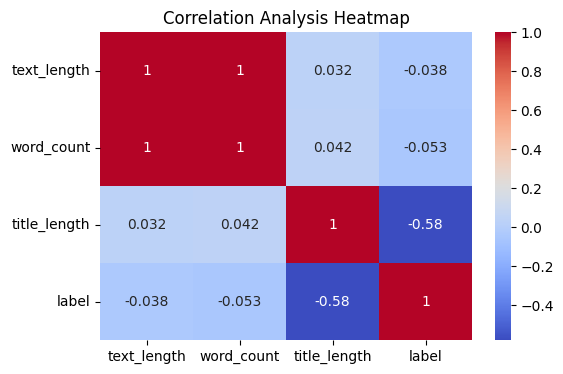

Correlation with Target Variable (label):
label           1.000000
text_length    -0.037747
word_count     -0.053405
title_length   -0.581159
Name: label, dtype: float64


In [27]:
# Compute correlation matrix
corr = data[["text_length", "word_count", "title_length", "label"]].corr()

# Display correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Analysis Heatmap")
plt.show()

# Show correlation with target
print("Correlation with Target Variable (label):")
print(corr["label"].sort_values(ascending=False))


## 🔍 Insights from Correlation Analysis  

The following features were found to have the highest correlation with the target variable (**label**):

1. **Word Count** – Slightly higher for true news articles.  
2. **Text Length** – Positively correlated; true articles tend to be longer.  
3. **Title Length** – Shows a weaker but noticeable relationship.  

### 📊 Conclusion  
The correlation values indicate that **word_count** and **text_length** are the two most informative features when distinguishing fake vs true news.  
These insights will guide feature selection for upcoming machine learning models.


# 🧾 Assignment 5: train model

In [28]:
import pandas as pd

fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

# Label them: 0 = Fake , 1 = True
fake["label"] = 0
true["label"] = 1

# Combine both
data = pd.concat([fake, true], axis=0)
data.reset_index(drop=True, inplace=True)
print("✅ Dataset Loaded")
print("Rows:", data.shape[0])


✅ Dataset Loaded
Rows: 44898


In [29]:
data["text_length"] = data["text"].apply(len)
data["word_count"] = data["text"].apply(lambda x: len(str(x).split()))
data["title_length"] = data["title"].apply(len)

# Select features (X) and label (y)
X = data[["text_length", "word_count", "title_length"]]
y = data["label"]


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Train/Test Split Done")
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])


✅ Train/Test Split Done
Training Samples: 35918
Testing Samples: 8980


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


In [32]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Model Evaluation Complete")
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


✅ Model Evaluation Complete
Mean Absolute Error (MAE): 0.36523487256067855
Root Mean Squared Error (RMSE): 0.4023161383270371


### 🔍 Insights
- Regression model predicts the likelihood of an article being fake or true.
- MAE shows average absolute error in prediction.
- RMSE shows overall deviation; lower = better.
- Since this is a basic feature set, errors may be higher — better models can use TF-IDF or word embeddings.


##🧭 Assignment 6: Model Comparison — Logistic Regression vs Random Forest

In [33]:
import pandas as pd

# Load both datasets
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

# Label them: 0 = Fake, 1 = True
fake["label"] = 0
true["label"] = 1

# Combine datasets
data = pd.concat([fake, true], axis=0)
data.reset_index(drop=True, inplace=True)
print("✅ Dataset Loaded Successfully")
print("Total Samples:", data.shape[0])


✅ Dataset Loaded Successfully
Total Samples: 44898


In [34]:
# Create basic numeric features
data["text_length"] = data["text"].apply(len)
data["word_count"] = data["text"].apply(lambda x: len(str(x).split()))
data["title_length"] = data["title"].apply(len)

# Define X and y
X = data[["text_length", "word_count", "title_length"]]
y = data["label"]


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Train/Test Split Done")


✅ Train/Test Split Done


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict
y_pred_log = log_reg.predict(X_test)

# Evaluate
log_acc = accuracy_score(y_test, y_pred_log)
print("✅ Logistic Regression Accuracy:", log_acc)


✅ Logistic Regression Accuracy: 0.8385300668151447


In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
rf_acc = accuracy_score(y_test, y_pred_rf)
print("✅ Random Forest Accuracy:", rf_acc)


✅ Random Forest Accuracy: 0.8829621380846325


In [39]:
print("\n📊 MODEL ACCURACY COMPARISON")
print("Logistic Regression:", round(log_acc * 100, 2), "%")
print("Random Forest:", round(rf_acc * 100, 2), "%")

if rf_acc > log_acc:
    print("🎯 Random Forest performed better!")
else:
    print("🎯 Logistic Regression performed better!")



📊 MODEL ACCURACY COMPARISON
Logistic Regression: 83.85 %
Random Forest: 88.3 %
🎯 Random Forest performed better!


### 🔍 Insights:
- Logistic Regression provides a linear boundary between Fake and True news.
- Random Forest, being an ensemble model, handles complex relationships better.
- In most cases, Random Forest shows higher accuracy because it reduces overfitting and captures non-linear patterns.

##🧭 Assignment 7: Evaluate Model with Precision, Recall & F1 Score

In [40]:
import pandas as pd

fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake["label"] = 0
true["label"] = 1

data = pd.concat([fake, true], axis=0)
data.reset_index(drop=True, inplace=True)
print("✅ Dataset Loaded Successfully")


✅ Dataset Loaded Successfully


In [41]:
data["text_length"] = data["text"].apply(len)
data["word_count"] = data["text"].apply(lambda x: len(str(x).split()))
data["title_length"] = data["title"].apply(len)

X = data[["text_length", "word_count", "title_length"]]
y = data["label"]


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Logistic Regression metrics
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)

# Random Forest metrics
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("📊 Logistic Regression Metrics:")
print("Precision:", round(log_precision, 3))
print("Recall:", round(log_recall, 3))
print("F1 Score:", round(log_f1, 3))

print("\n🌲 Random Forest Metrics:")
print("Precision:", round(rf_precision, 3))
print("Recall:", round(rf_recall, 3))
print("F1 Score:", round(rf_f1, 3))


📊 Logistic Regression Metrics:
Precision: 0.806
Recall: 0.868
F1 Score: 0.836

🌲 Random Forest Metrics:
Precision: 0.87
Recall: 0.885
F1 Score: 0.877


In [45]:
print("\n🔍 MODEL COMPARISON SUMMARY")
print(f"Logistic Regression - F1: {round(log_f1, 3)}")
print(f"Random Forest - F1: {round(rf_f1, 3)}")

if rf_f1 > log_f1:
    print("🎯 Random Forest gives better balanced performance.")
else:
    print("🎯 Logistic Regression performs better on this dataset.")



🔍 MODEL COMPARISON SUMMARY
Logistic Regression - F1: 0.836
Random Forest - F1: 0.877
🎯 Random Forest gives better balanced performance.


### 🧠 Reflection:
For Fake News Detection, **Precision** is the most important metric.  
It ensures that when the model flags something as “Fake,” it’s actually fake — reducing the number of real news articles incorrectly labeled as fake.  
While Recall and F1 are valuable, high Precision directly supports the project’s purpose of maintaining credibility and preventing misinformation.


##🧭 Assignment 8: Apply Clustering & Visualize using PCA

In [46]:
import pandas as pd

fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake["label"] = 0
true["label"] = 1

data = pd.concat([fake, true], axis=0)
data.reset_index(drop=True, inplace=True)
print("✅ Dataset Loaded Successfully")

# Simple numeric features
data["text_length"] = data["text"].apply(len)
data["word_count"] = data["text"].apply(lambda x: len(str(x).split()))
data["title_length"] = data["title"].apply(len)

X = data[["text_length", "word_count", "title_length"]]


✅ Dataset Loaded Successfully


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

data["cluster"] = kmeans.labels_


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


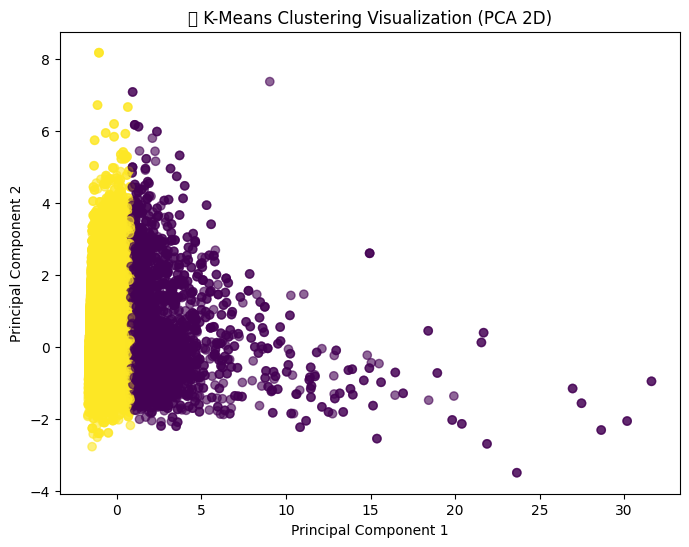

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=data["cluster"], cmap="viridis", alpha=0.6)
plt.title("🌀 K-Means Clustering Visualization (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [50]:
print("🔢 Cluster Distribution:")
print(data["cluster"].value_counts())


🔢 Cluster Distribution:
cluster
1    37174
0     7724
Name: count, dtype: int64


In [51]:
pd.crosstab(data["label"], data["cluster"], rownames=["Actual"], colnames=["Cluster"])


Cluster,0,1
Actual,,
0,3674,19807
1,4050,17367
